In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from math import ceil
import seaborn as sns
import statsmodels.stats.api as sms
from scipy.stats import binom
from scipy.stats import chisquare
from scipy.stats import chi2

In [2]:
df = pd.read_csv("C:/Users/Rober/Downloads/assessment_da25.csv", index_col=False)

In [3]:
df.head(5)

,Variant,Number of page views,GMV (in $),Number of add to cart,Clicks on media,Time on Page (sec),user_id
0,A,5,0.0,0,2,74,0
1,A,4,0.0,4,1,21,1
2,A,4,0.0,2,0,1,2
3,A,5,0.0,0,1,26,3
4,A,5,0.0,3,3,46,4


In [4]:
# Add a new binary column named 'Converted'
df['Converted'] = [0 if x == 0 else 1 for x in df['Number of add to cart']]
df.head(5)

,Variant,Number of page views,GMV (in $),Number of add to cart,Clicks on media,Time on Page (sec),user_id,Converted
0,A,5,0.0,0,2,74,0,0
1,A,4,0.0,4,1,21,1,1
2,A,4,0.0,2,0,1,2,1
3,A,5,0.0,0,1,26,3,0
4,A,5,0.0,3,3,46,4,1


In [6]:
#Creating Group A and B
VariantA = df[df['Variant'] == 'A'] 
VariantB = df[df['Variant'] == 'B'] 
VariantB.head(5)



,Variant,Number of page views,GMV (in $),Number of add to cart,Clicks on media,Time on Page (sec),user_id,Converted
1000,B,3,0.0,2,1,16,1000,1
1001,B,1,0.0,3,0,6,1001,1
1002,B,8,0.0,3,2,6,1002,1
1003,B,6,0.0,0,0,31,1003,0
1004,B,1,0.0,5,0,68,1004,1


In [14]:
#quick check which Variant has higher total GMV $
A_GMV = VariantA['GMV (in $)'].sum()
B_GMV = VariantB['GMV (in $)'].sum()
print(A_GMV)
print(B_GMV)


7689.989999999999
9289.529999999999


In [7]:
#Getting number of users who added at least 1 item to cart from each Variant
AaddtocartUSERS = VariantA['Number of add to cart'].astype(bool).sum(axis=0)
BaddtocartUSERS = VariantB['Number of add to cart'].astype(bool).sum(axis=0)
print(AaddtocartUSERS)
print(BaddtocartUSERS)

857
896


In [8]:
#Conversion rates: number of users that added an item or more to cart divided by total #users
Conversion_Rate_A = AaddtocartUSERS / VariantA.shape[0]
Conversion_Rate_B = BaddtocartUSERS / VariantB.shape[0]

print(Conversion_Rate_A)
print(Conversion_Rate_B)

#Calculating Lift
print([Conversion_Rate_B - Conversion_Rate_A]/Conversion_Rate_A)

0.857
0.896
[0.04550758]


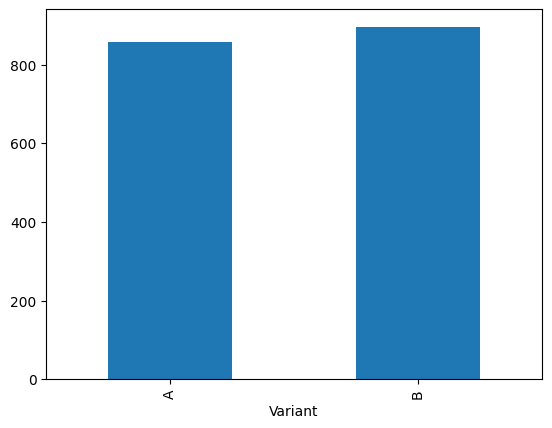

In [9]:
import matplotlib.pyplot as plt
df.groupby('Variant').Converted.sum().plot(kind='bar')
plt.show()

In [10]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

In [11]:
#Runing a two sided Z test
n_con = VariantA['Variant'].count()
n_treat = VariantB['Variant'].count()
successes =[VariantA['Converted'].sum(), VariantB['Converted'].sum()]
nobs = [n_con, n_treat]


z_stat, pval = proportions_ztest(successes, nobs=nobs)

(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, nobs=nobs, alpha=0.05)
print(f'z statistic: {z_stat:.2f}')
print(f'p value: {pval:.3f}')
print(f'ci 95% for control group: [{lower_con:.3f}, {upper_con:.3f}]')
print(f'ci 95% for treatment group: [{lower_treat:.3f}, {upper_treat:.3f}]')


z statistic: -2.65
p value: 0.008
ci 95% for control group: [0.835, 0.879]
ci 95% for treatment group: [0.877, 0.915]


In [12]:
#Zscore indicates 2.65 standard deviations below the mean
#since our p value is below 0.05 we can reject the null hyphothesis
#confidence interval for group B = 0.038 
#this is a little less than the 0.046 lift witnessed earlier, but still higher than baseline

#Conclusion Variation B is a winner at a 95% confidence level. 